In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from sklearn.decomposition import PCA
import pickle

In [2]:
df = pickle.load(open('./data/data_images_100_100.pickle',mode='rb'))
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.002891,0.002799,0.002799,0.002845,0.002676,0.002784,0.002953,0.002768,0.003337,0.003353,...,0.001707,0.001769,0.001784,0.001876,0.001784,0.001845,0.001830,0.001799,0.001692,female
1,0.000492,0.000354,0.000477,0.000415,0.000431,0.000461,0.000431,0.000507,0.000554,0.000461,...,0.000723,0.000415,0.000523,0.000338,0.000415,0.000354,0.000569,0.000969,0.000277,female
2,0.000754,0.000754,0.000538,0.000523,0.000646,0.000615,0.000538,0.000600,0.001092,0.000953,...,0.003537,0.003552,0.003645,0.003660,0.003537,0.003383,0.003260,0.003230,0.003199,female
3,0.002030,0.001861,0.001815,0.001492,0.001307,0.001415,0.001399,0.001692,0.002384,0.002491,...,0.001707,0.000953,0.000953,0.001015,0.001246,0.001384,0.001538,0.001661,0.001738,female
4,0.003599,0.003599,0.003599,0.003506,0.003552,0.003153,0.001876,0.001507,0.001138,0.000830,...,0.003737,0.003645,0.003645,0.003676,0.003645,0.003629,0.003706,0.003660,0.003691,female


In [3]:
X = df.drop(['gender'],axis=1).values
X

array([[0.0028912 , 0.00279892, 0.00279892, ..., 0.00183007, 0.00179931,
        0.00169166],
       [0.00049212, 0.00035371, 0.00047674, ..., 0.00056901, 0.00096886,
        0.00027682],
       [0.00075356, 0.00075356, 0.00053825, ..., 0.00326028, 0.00322953,
        0.00319877],
       ...,
       [0.00275279, 0.00276817, 0.00276817, ..., 0.00262976, 0.00270665,
        0.00286044],
       [0.00058439, 0.00056901, 0.00056901, ..., 0.0009381 , 0.00099962,
        0.00104575],
       [0.00279892, 0.0028143 , 0.00282968, ..., 0.00292195, 0.00292195,
        0.00292195]])

In [6]:
mean_face = X.mean(axis=0)
mean_face.shape

(10000,)

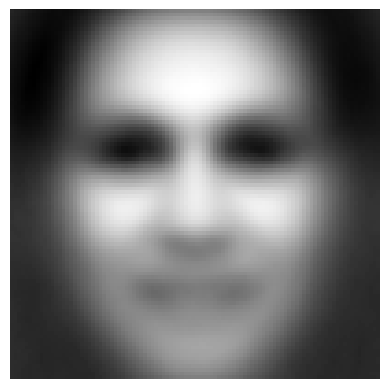

In [8]:
plt.imshow(mean_face.reshape(100,100),cmap='gray')
plt.axis('off')
plt.show()

In [9]:
X_t = X - mean_face

In [10]:
## Applying PCA to X_t

In [11]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [13]:
ex_variance_Df = pd.DataFrame()
ex_variance_Df['explained_variance'] = pca.explained_variance_ratio_
ex_variance_Df['Cumulative_explained_variance'] = ex_variance_Df['explained_variance'].cumsum()
ex_variance_Df['principle_component'] = np.arange(1,len(ex_variance_Df)+1)
ex_variance_Df.head()

,explained_variance,Cumulative_explained_variance,principle_component
0,0.251183,0.251183,1
1,0.115910,0.367093,2
2,0.104324,0.471416,3
3,0.052152,0.523568,4
4,0.033069,0.556637,5


In [15]:
ex_variance_Df.set_index("principle_component",inplace=True)

<Axes: xlabel='principle_component'>

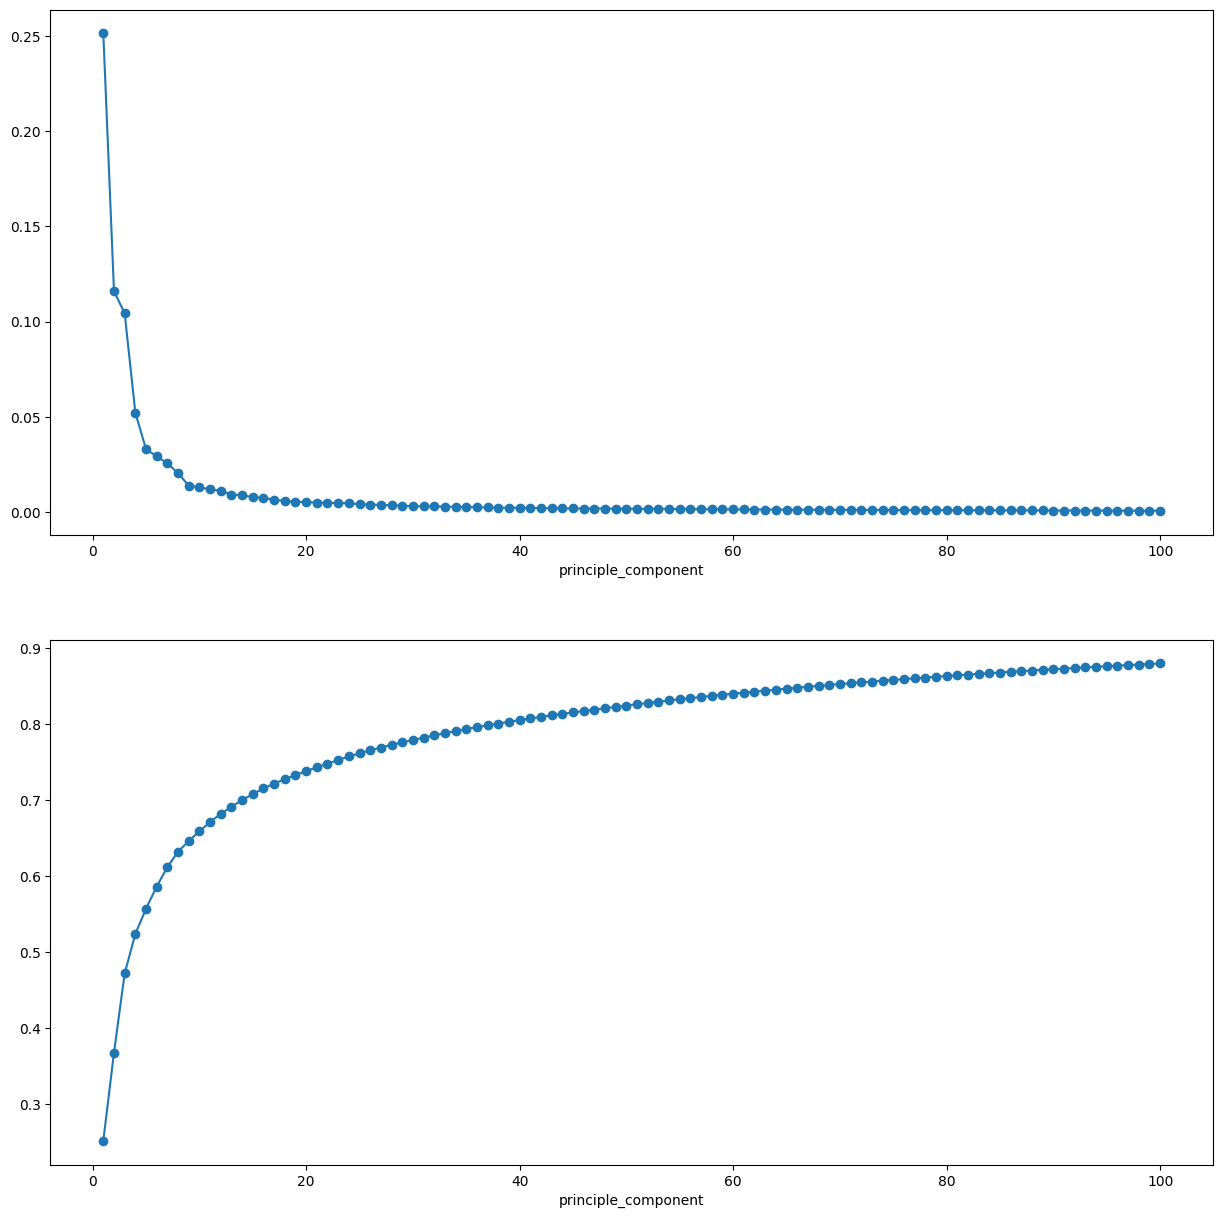

In [20]:
fig,ax = plt.subplots(nrows = 2,figsize=(15,15))
ex_variance_Df['explained_variance'].head(100).plot(kind='line',marker='o',ax = ax[0])
ex_variance_Df['Cumulative_explained_variance'].head(100).plot(kind='line',marker='o',ax = ax[1])


In [21]:
pca_60 = PCA(n_components=60,whiten=True,svd_solver='auto')
pca_data = pca_60.fit_transform(X_t)

In [22]:
pca_data.shape

(4552, 60)

In [24]:
y = df['gender'].values
np.savez('./data/data_pca_60_targets',pca_data,y)

In [25]:
pca_dict = {'PCA':pca_data,'Mean_Face':mean_face}

In [27]:
pickle.dump(pca_dict,open('./haar_model/pca_dict_pickle','wb'))

In [29]:
pca_data_inv = pca_60.inverse_transform(pca_data)
pca_data_inv.shape

(4552, 10000)

(-0.5, 99.5, 99.5, -0.5)

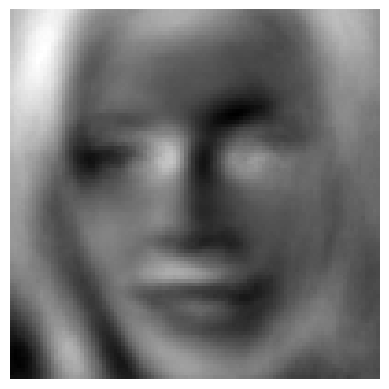

In [31]:
eigen_image = pca_data_inv[0].reshape((100,100))
plt.imshow(eigen_image,cmap='gray')
plt.axis('off')
